## EDA

In [86]:
#Aca importamos las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("NY_airbnb.csv")

In [87]:
#Aca se muestran los valores estadisticos de cada columna.

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [88]:
# Aca se muestra que tenemos 16 series y 48895 filas 
df.shape

(48895, 16)

In [89]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [128]:
str("room_type")

    

'room_type'

In [132]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [130]:
#Aca se muestra con que ayuntamiento vamos a trabajar, que en total son 5 

nhgroup = df.groupby("neighbourhood_group").count()

nhgroup 

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [143]:
#Total de ofertas por ayuntamiento
#Bronx=1091

neighbourhood1 = df[df["neighbourhood_group"] == "Bronx"]

neighbourhood1


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,2019-06-27,0.50,13,365
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,2019-01-02,0.35,2,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,36426093,Best room in nyc,273877318,Jay,Bronx,Claremont Village,40.83926,-73.91173,Private room,140,1,0,NaN,NaN,1,90
48792,36428186,Private house Apartment,141511069,Carolina,Bronx,Morrisania,40.83146,-73.89666,Entire home/apt,80,7,0,NaN,NaN,1,71
48795,36429652,Cute double room for the perfect Yankee fan,58222366,Dominique,Bronx,Claremont Village,40.83502,-73.91058,Private room,125,2,0,NaN,NaN,1,364
48796,36435986,1A. Studio & Stay. 30 minutes to Midtown Manha...,37678939,Chantal,Bronx,Concourse Village,40.83372,-73.91187,Private room,70,2,0,NaN,NaN,2,81


In [144]:
#Total de ofertas por ayuntamiento
#Brooklyn=20104 

neighbourhood2 = df[df["neighbourhood_group"] == "Brooklyn"]

neighbourhood2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,NaN,NaN,1,31
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,NaN,1,341
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9


In [95]:
#Total de ofertas por ayuntamiento
#Manhattan=21661  

neighbourhood3 = df[df["neighbourhood_group"] == "Manhattan"]

neighbourhood3

In [96]:
#Total de ofertas por ayuntamiento
#Queens=5666   

neighbourhood4 = df[df["neighbourhood_group"] == "Queens"]

neighbourhood4

In [97]:
#Total de ofertas por ayuntamiento
#Staten Island=373    

neighbourhood5 = df[df["neighbourhood_group"] == "Staten Island"]

neighbourhood5

# Hipotesis

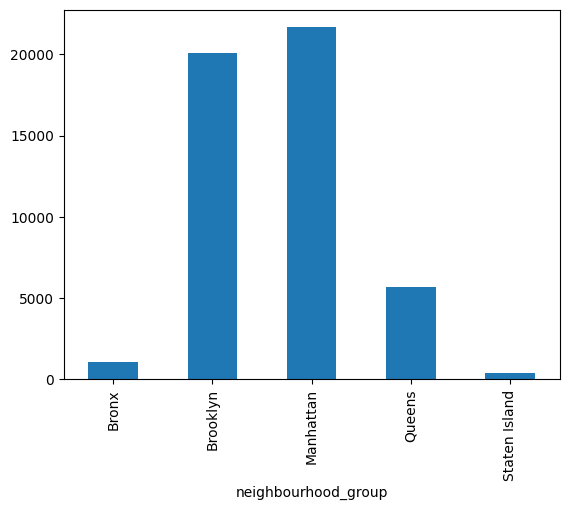

In [133]:
#Se realizo un grafico de Barras y determinamos que el ayuntamiento mas caro para alquiler es Manhattan
#Una de nuestras hipotesis es que el Bronx es un area de alquiler barato porque algunas de sus areas tienen alto nivel de violencia 


nhgroup["price"].plot(kind="bar")

plt.show()

In [134]:
#Se hizo una agrupacion de oferta por ayuntamiento

lista2 = df.groupby("neighbourhood_group")["neighbourhood_group"].count()

lista2

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

# 1.1 Hipotesis

<AxesSubplot:xlabel='neighbourhood_group'>

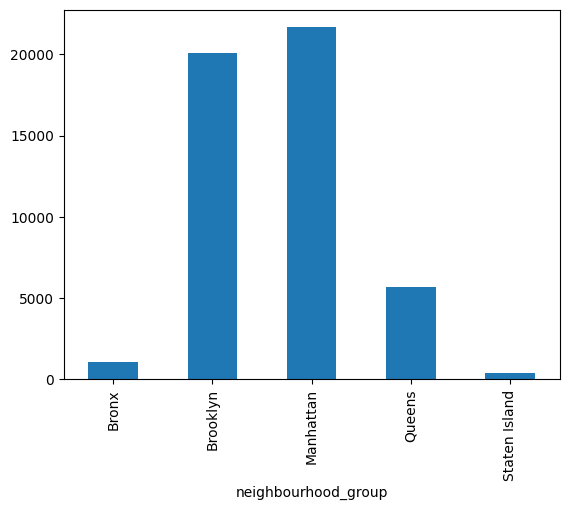

In [135]:
#Comparacion de disponibilidad
#Como otra hiipotesis nos damos cuenta que Brooklyn y Manhattan 
#hay mas flujo de disponibilidad por ser area turistica

nhgroup["availability_365"].plot(kind="bar")

# Limpieza de Datos

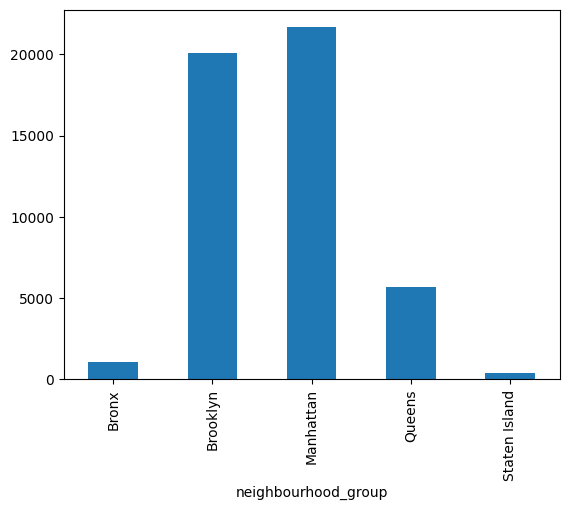

In [136]:
#Nos dimos cuenta que podiamos hacer la misma grafica 
#con diferentes variables
lista2.plot(kind="bar");

In [137]:
#Se hizo limpieza de columnas que creemos que no son necesarias

df.drop(columns=["id", "host_name", "host_id", "name", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"])


,neighbourhood_group,neighbourhood,room_type,price,availability_365
0,Brooklyn,Kensington,Private room,149,365
1,Manhattan,Midtown,Entire home/apt,225,355
2,Manhattan,Harlem,Private room,150,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,194
4,Manhattan,East Harlem,Entire home/apt,80,0
...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,9
48891,Brooklyn,Bushwick,Private room,40,36
48892,Manhattan,Harlem,Entire home/apt,115,27
48893,Manhattan,Hell's Kitchen,Shared room,55,2
